<h1 style="text-align:center">Advanced Statistical Inference</h1>
<h1 style="text-align:center">Bayesian Logistic Regression - Metropolis-Hastings</h1>



## 1. Aims
<div class="alert alert-info">
<ul> 
<li> To implement the MH algorithm.
<li> To use it to compute classification probabilities.
</ul>
</div>

## 2. Metropolis-Hastings
<div class="alert alert-info">
In this lab, you’re going to implement the Metropolis-Hasting algorithm described in the lecture.
Use the binary classification data `binaryclass2.mat` and the function `laplacecomp()`. If you
pass this function a 2-dimensional $w$ vector, it will return $g(w; X, t, \sigma^2)$ and $log(g(w; X, t, \sigma^2))$.
(Remember that $g(w; X, t, \sigma^2) \propto p(w|X, t, \sigma^2)$, the posterior density of interest.)
</div>

In [3]:
import scipy.io
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('binaryclass2.mat')

In [4]:
X = mat['X']
t = mat['t']

In [5]:
np.unique(t)

array([0, 1], dtype=uint8)

<div class="alert alert-info">
Visualise the data using a scatter plot.
</div>

Text(0,0.5,'y-axis')

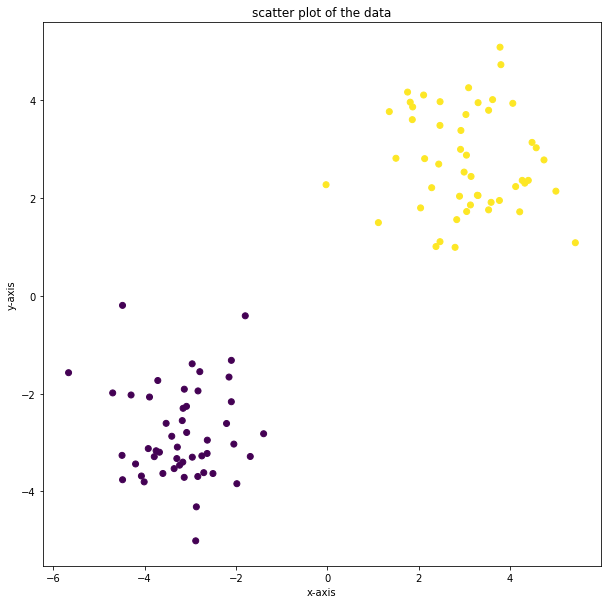

In [6]:
plt.figure(figsize=(10,10))
colors = [int(i % 2) for i in t]
plt.scatter(X[:,0],X[:,1],c=colors)
plt.title("scatter plot of the data")
plt.xlabel("x-axis")
plt.ylabel("y-axis")


<div class="alert alert-info">
Make sure `laplacecomp()` works by passing it some different $w$ vectors ($w$ needs to have
dimension 2×1).</div>

In [116]:
def laplacecomp(w,X,t):
    """This function computes g and log(g) for the laplace model introduced in the lecture."""
    w = np.array(w)
    X = np.array(X)
    t = np.array(t)
    ss = 10 # Prior variance (sigma squared)
    # Evaluate log prior
    log_g = -(1/(2*ss))*w.T.dot(w)
    # Compute P
    P = 1/(1+np.exp(-X.dot(w)))
    log_l = np.sum(t*np.log(P) + (1-t)*(np.log(1-P)))
    log_g = log_g + log_l
    g = np.exp(log_g)
    return g[0][0], log_g[0][0]

In [118]:
w=np.array([[2],[1]])
g,log_g=laplacecomp(w,X,t)
log_g

-0.4385117461804966

<div class="alert alert-info">

Implement the MH algorithm (see the flowchart in the slides). 
<br>
You might find it safest to work with $log(g)$ – the ratio then becomes a subtraction that must then be exponentiated. This has more numerical stability, especially when $w$ isn’t very good. You can start with any value of $w$. E.g., $w = randn(2,1)$. Also, use a Gaussian proposal: For example: $wp = randn(2,1)*0.5+w$ where $w$ is the current sample and $wp$ is the proposal and the Gaussian has standard deviation $0.5$ (set this as you please).
</div>

In [235]:
import math

def log_operations(x,mean,variance):
        return np.sum(-np.divide(np.power((x-mean),2),(2*variance))-np.log(np.sqrt(2*math.pi*variance)))

def MH(X, t, numSamples):
    s=0
    ws=[]
    var=np.diag(np.array([2,2]))
    var_vector=np.array([2,2])
    ws.append(np.random.randn(2,1))
    for s in range(1,numSamples):
        wp=0.5*np.random.randn(2,1)+ws[s-1] 
        a,log_g_numerator=laplacecomp(wp,X,t)
        a,log_g_denomenator=laplacecomp(ws[s-1],X,t)
        log_total=log_g_numerator-log_g_denomenator
        r=np.exp(log_total)
        if(r>=1):
            ws.append(wp)
        else:    
            u=np.random.rand(1)
            if(u<=math.exp(log_total)):
                ws.append(wp)   
            else:
                ws.append(ws[s-1])
    samples=np.array([np.array([x[0],x[1]]).reshape((2,)) for x in ws])            
    return samples          


<div class="alert alert-info">
Draw samples from your MH algorithm and plot the distribution of values obtained.
</div>

In [ ]:
numSamples = 10000
w_samples = MH(X,t, numSamples)

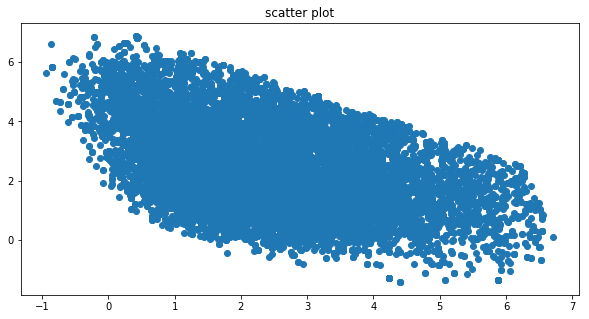

In [237]:
plt.figure(figsize=(10,5))
plt.title("scatter plot")
plt.scatter(w_samples[:,0],w_samples[:,1])

<div class="alert alert-info">
Compute the probability $P (t_{new} = 1 | x_{new} , X, t)$ when $x_{new} = [2,-4]^T$ . 
<br>
Hint – compute the probability for each value of $w$ using:
$$ \dfrac{1}{1+\exp(-w^T x_{new})} $$
</div>

In [238]:
def predict(samples, x_new):
    p = 0
    p=(1/samples.shape[0])*np.sum(1/(1+np.exp(np.dot(-samples,x_new.T))),axis=0)
    
    return p

In [239]:
x_new = np.array([[-2,-4],[4,4],[4,5]])
predict(w_samples, x_new)

array([6.18918332e-04, 9.99967392e-01, 9.99981364e-01])

<div class="alert alert-success">
Create a contour plot over the given range of values, while also showing the prediction for ${x_{new}}$.
</div>

Text(0.5,1,'Simplest default with labels')

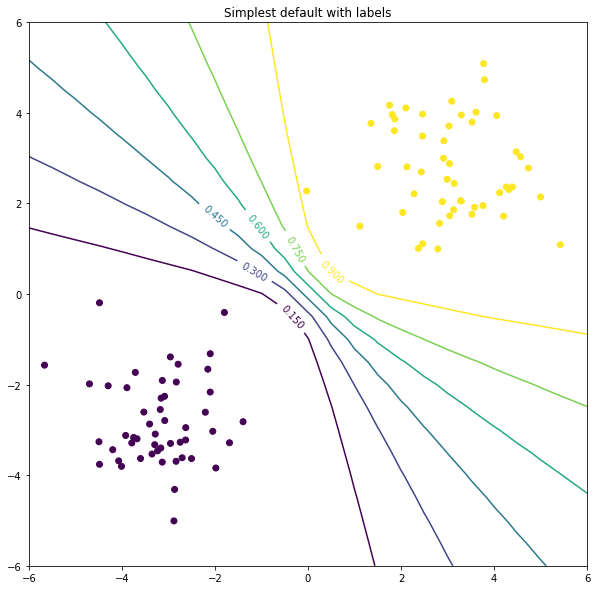

In [240]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
x1min, x1max, x1step = (-6, 6.5, 0.5)
x2min, x2max, x2step = (-6, 6.5, 0.5)
x1_range = np.arange(x1min, x1max, x1step)
x2_range = np.arange(x2min, x2max, x2step)
colors = [int(i % 2) for i in t]
plt.figure(figsize=(10,10))
plt.scatter(X[:,0],X[:,1],c=colors)
xnew=np.array([ [x,y] for x in x1_range for y in x2_range])
p=predict(w_samples, xnew)
p=p.reshape((x1_range.shape[0],x2_range.shape[0]))
CS = plt.contour(x1_range, x2_range, p)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


<div class="alert alert-success">
Comment on the plot.
</div>

<div class="alert alert-success">
We can see that getting closer to the class makes the probability either high or low thus we can assign a class to the new point,however in the middle, we are still not sure which class to choose.</div>